# Making TESScut finder charts using mkpy3


# V1460 Her (CRTS J162117.3+441254)

Show the notebook information:

In [1]:
import os
print(os.getcwd(),' =$PWD')
nb = 'nb_v1460_her_tess_v10.ipynb'
version = '2020SEP30T1607  v0.12'
print(nb,version,'=nb')

/Users/kmighell/top/tess/colin_littlefield/mkpy3  =$PWD
nb_v1460_her_tess_v10.ipynb 2020SEP30T1607  v0.12 =nb


Make sure that lightkurve has been installed:

In [2]:
import sys
try:
    import lightkurve as lk
except Exception:
    print('\n***** ERROR *****\n')
    print('The Python package lightkurve needs to be installed.\n')
    print('This is the installation command for lightkurve using pip:\n')
    print('pip install lightkurve --upgrade\n')
    print('For further installation details see the lightkurve homepage:\n')
    print('https://docs.lightkurve.org/about/install.html\n')
    sys.exit(1)
# pass:try
print(lk.__version__, ' : lightkurve version')

2.0a2.dev  : lightkurve version


Import external software:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import ntpath
import datetime
import astropy.units as u
import reproject as rp  # pip install reproject
import lightkurve as lk

Import mpkpy3 software. GitHub source: https://github.com/KenMighell/mkpy3

In [4]:
import mkpy3_plot_add_compass_rose_v4 as km1
import mkpy3_tess_tpf_overlay_v6 as km2

Download TESS Sector 24 observations of V1460 Her from MAST (Mikulski Archive for Space Telescopes) at the Space Telescope Science Institute (STScI):

In [5]:
target = 'V1460 Her'
sector = 24
title = target + ' : TESS : Sector ' + str(sector)
print('DOWNLOAD START:', str(datetime.datetime.now()))
search_results = lk.search_tesscut(target=target, sector=sector)[0]
tpf = search_results[0].download(cutout_size=(19,21), quality_bitmask=0)
print('DOWNLOAD  STOP:', str(datetime.datetime.now()))
print('TPF dirname: ', os.path.dirname(tpf.path))
print('TPF filename:', ntpath.basename(tpf.path))       

DOWNLOAD START: 2020-09-30 16:08:11.548045
DOWNLOAD  STOP: 2020-09-30 16:08:19.863579
TPF dirname:  /Users/kmighell/.lightkurve-cache/tesscut
TPF filename: tess-s0024-2-4_245.322350_44.215030_21x19_astrocut.fits


Show the Target Pixel File (TPF) image data with a compass rose:

Long points North
Short points East


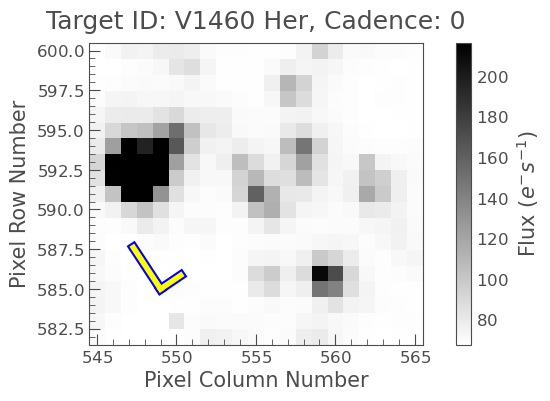

In [6]:
# TPF image with a compass rose using a mkpy3 function
ax = tpf.plot(cmap='gray_r')
import mkpy3_plot_add_compass_rose_v4 as km1
km1.mkpy3_plot_add_compass_rose_v4(ax=ax, wcs=tpf.wcs, north_arm_arcsec=63, cx=549, cy=585)

print('Long points North')
print('Short points East')

Show the TPF overlay on top of "DSS2 Red" (optical) survey data using mkpy3:


TPF filename: tess-s0024-2-4_245.322350_44.215030_21x19_astrocut.fits
TPF dirname:  /Users/kmighell/.lightkurve-cache/tesscut


***** ROTATE IMAGE *****:
True =flip_x
False =flip_y
True =flip
29.571 =rotate_deg [deg] : rotation angle


212.132034 =radius_arcsec  (0.500000 =shrink)

False =print_gaia_dr2
^--- set this keyword argument to True to print the GAIA DR2 catalog results.

True =print_vsx
^--- set this keyword argument to False to *not* print the VSX catalog results.


# VSX : AAVSO International Variable Star indeX
# n      sep    RAJ2000      DEJ2000       Period     VSX_max   VSX_min  VSX_Name      VSX_Type
#   [arcsec]    [deg]        [deg]         [days]     [mag]     [mag]
  1    0.060  245.3223300   44.2150300     0.207852    13.100    15.580 'V1460 Her' 'UG+E'

# VSX : AAVSO International Variable Star indeX
# n   RAJ2000       DEJ2000        RAJ2000        DEJ2000
#     [deg]         [deg]          [hms]          [dms]
  1  245.3223300   44.2150300   16h21m17.3592s   

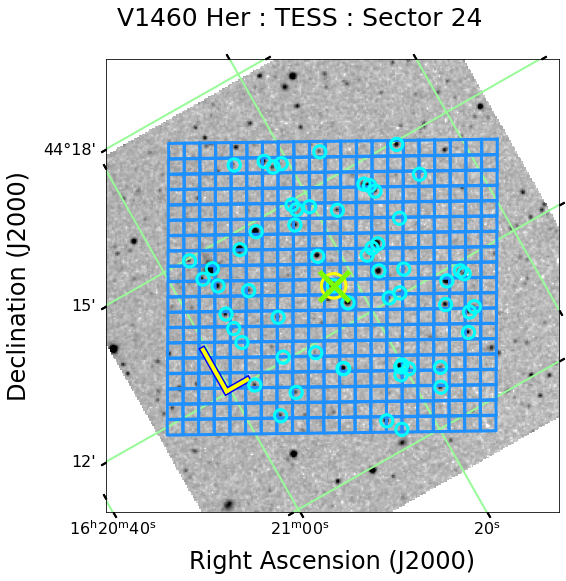

In [7]:
import mkpy3_tess_tpf_overlay_v6 as km2
ax = km2.mkpy3_tess_tpf_overlay_v6(tpf=tpf, survey='DSS2 Red', width_height_arcmin=10.0,
  print_gaia_dr2=False, sexagesimal=True, rotate_deg_str="'tpf'", title=title, shrink=0.5, 
  show_plot=False)

import mkpy3_plot_add_compass_rose_v4 as km1
km1.mkpy3_plot_add_compass_rose_v4(ax=ax, north_arm_arcsec=63, cx=220, cy=80)

ax.grid(True, color='palegreen', lw=2)  # add the RA and DEC grid

ax.invert_xaxis()  # show increasing RA to the *right* to match Colin Littlefield's plot

**This graph makes it easy to identify the stars in the TPF image.**

Key:
* The yellow circle shows the target (V1460 Her).  
* The cyan circles show GAIA DR2 stars.  
* The green X shows the only VSX star in the field (the target).

Compass rose:
* Long arm points North.  
* Short arm points East.

Compare this plot with one created by Colin Littlefield using an earlier version of the mkpy3 software:

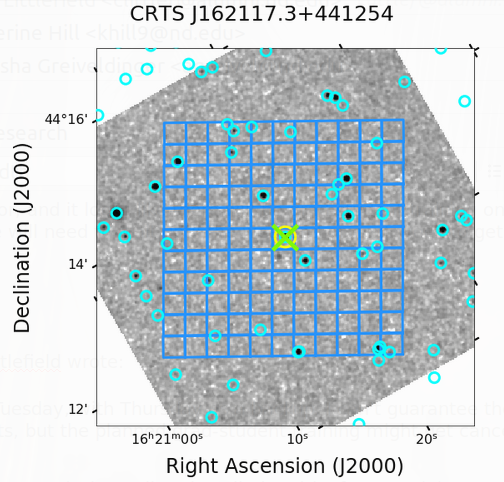

In [8]:
import IPython.display as ipd
iplot = 'nb_v1460_her_tess_clx1.png'  # source: Colin Littlefield
ipd.Image(filename=iplot)

In [9]:
# ====================================================================================================================
# ADDITIONAL PLOTS ===================================================================================================
# ====================================================================================================================

Redisplay the output plot of In[6] cell #6 with the compass rose pointing with the standard orientation:

mkpy3_plot1.png  <--- plot file written

Long points North
Short points East


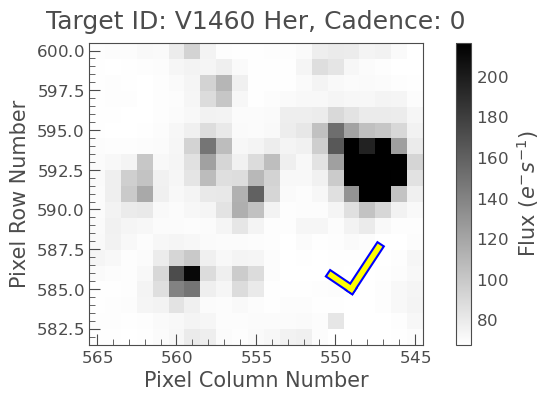

In [10]:
# TPF image with a compass rose using a mkpy3 function
ax = tpf.plot(cmap='gray_r')
import mkpy3_plot_add_compass_rose_v4 as km1
km1.mkpy3_plot_add_compass_rose_v4(ax=ax, wcs=tpf.wcs, north_arm_arcsec=63, cx=549, cy=585)

ax.invert_xaxis()  # North arm points "up" and East arm points "left"

oplot1 = 'mkpy3_plot1.png'
plt.savefig(oplot1, dpi=150, bbox_inches = "tight")
print(oplot1,' <--- plot file written\n')
print('Long points North')
print('Short points East')

Rotate the plot so North points up and East points left:

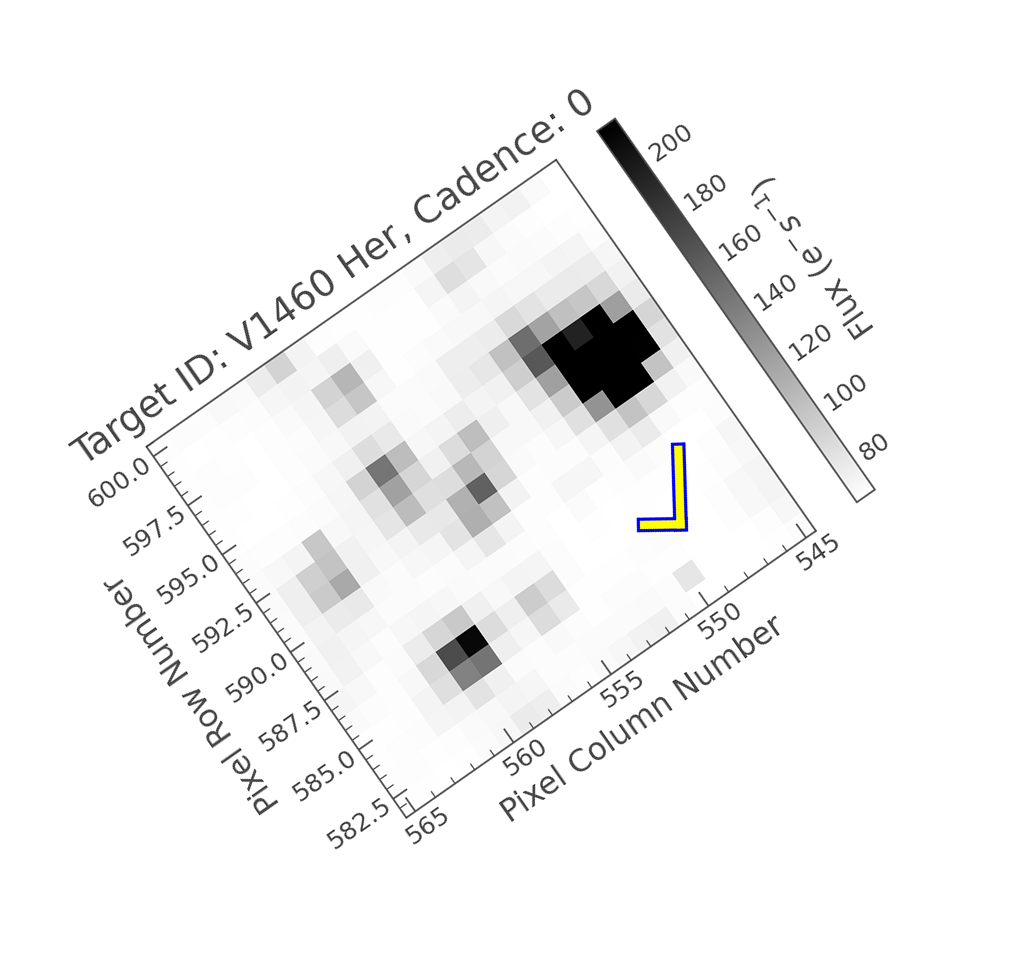

In [11]:
# rotate the plot
from PIL import Image  # pip install Pillow
iplot1 = 'mkpy3_plot1.png'
oplot2 = 'mkpy3_plot2.png'
angle_deg = 35
img = Image.open(iplot1)
img = img.rotate(angle_deg,expand=True,resample=Image.BICUBIC ) # degrees
img.save(oplot2)

import IPython.display as ipd
ipd.Image(filename=oplot2, width=650)

Show the TPF overlay on top of "DSS2 Red" (optical) *unrotated* survey data using mkpy3:


TPF filename: tess-s0024-2-4_245.322350_44.215030_21x19_astrocut.fits
TPF dirname:  /Users/kmighell/.lightkurve-cache/tesscut


212.132034 =radius_arcsec  (0.500000 =shrink)

False =print_gaia_dr2
^--- set this keyword argument to True to print the GAIA DR2 catalog results.

True =print_vsx
^--- set this keyword argument to False to *not* print the VSX catalog results.


# VSX : AAVSO International Variable Star indeX
# n      sep    RAJ2000      DEJ2000       Period     VSX_max   VSX_min  VSX_Name      VSX_Type
#   [arcsec]    [deg]        [deg]         [days]     [mag]     [mag]
  1    0.060  245.3223300   44.2150300     0.207852    13.100    15.580 'V1460 Her' 'UG+E'

# VSX : AAVSO International Variable Star indeX
# n   RAJ2000       DEJ2000        RAJ2000        DEJ2000
#     [deg]         [deg]          [hms]          [dms]
  1  245.3223300   44.2150300   16h21m17.3592s   44d12m54.108s

245.32235 =ra_deg
44.21503 =dec_deg
0 =cadenceno
0 =frame

mkpy3_plot.png <--- plot_file writ

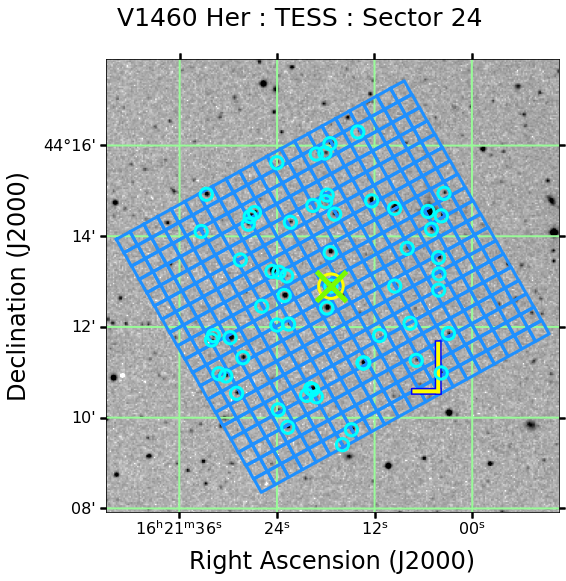

In [12]:
import mkpy3_tess_tpf_overlay_v6 as km2
ax = km2.mkpy3_tess_tpf_overlay_v6(tpf=tpf, survey='DSS2 Red', width_height_arcmin=10.0,
  print_gaia_dr2=False, sexagesimal=True, rotate_deg_str='0.0', title=title, shrink=0.5, 
  show_plot=False)

import mkpy3_plot_add_compass_rose_v4 as km1
km1.mkpy3_plot_add_compass_rose_v4(ax=ax, north_arm_arcsec=63, cx=220, cy=80)

ax.grid(True, color='palegreen', lw=2)  # add the RA and DEC grid

In [13]:
# EOF